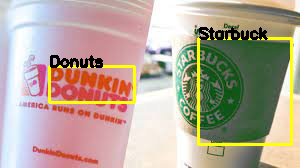

In [83]:
import cv2
from google.colab.patches import cv2_imshow

def colorProfiles(n):
    if n == 0 :
        name = "Donuts"
        hsv_lower = ( 0,100,100)
        hsv_upper = (15,255,255)
        return (name,hsv_lower,hsv_upper)
    if n == 1 :
        name = "Starbuck"
        hsv_lower = ( 0,50,89)
        hsv_upper = (120,100,115)
        return (name,hsv_lower,hsv_upper)


frame = cv2.imread("/content/downlrroad.jpg")
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
rects = {}

for i in range(2):
	name, hsv_lower, hsv_upper = colorProfiles(i)
	mask = cv2.inRange(hsv,hsv_lower,hsv_upper)
	conts, herirarchy = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
	biggest = sorted(conts,key = cv2.contourArea,reverse=True)[0]
	rect = cv2.boundingRect(biggest)
	x,y,w,h = rect
	cv2.rectangle(frame,(x,y),(x+w,y+h),(10,255,255),2)
	cv2.putText(frame, name, (x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
 
cv2_imshow(frame)

cv2.waitKey(0)
cv2.destroyAllWindows()